In [41]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
# Data Loading
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Decision Tree

In [42]:
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state =3)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Classification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.92      0.96        12
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix:
 [[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]
Accuracy Score: 0.9736842105263158


#Building Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.predict([[3, 5, 4, 2]])
from sklearn.ensemble import RandomForestClassifier

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)


import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.columns.values[:4]).sort_values(ascending=False)
feature_imp

Accuracy: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


petal_length    0.488025
petal_width     0.365311
sepal_length    0.114428
sepal_width     0.032236
dtype: float64

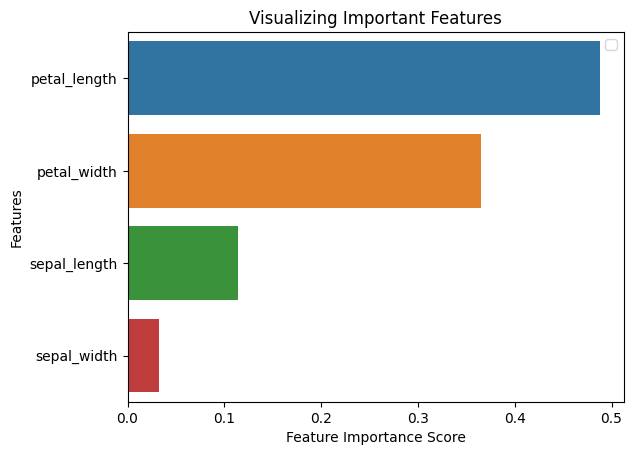

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()